#Importing Dataset


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

##Training Image preprocessing


In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/AI Project/Smart Fruits and vegetables Classify System/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 3115 files belonging to 36 classes.


#Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/AI Project/Smart Fruits and vegetables Classify System/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 351 files belonging to 36 classes.


#Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [ ]:
# Output Layer
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax'))

#Compiling and Training Phase

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 954s 10s/step - accuracy: 0.0285 - loss: 25.8340 - val_accuracy: 0.0313 - val_loss: 3.5807
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.0392 - loss: 3.5829 - val_accuracy: 0.0484 - val_loss: 3.5626
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.0373 - loss: 3.5724 - val_accuracy: 0.0399 - val_loss: 3.5399
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.0395 - loss: 3.5627 - val_accuracy: 0.0342 - val_loss: 3.5628
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.0423 - loss: 3.5567 - val_accuracy: 0.0342 - val_loss: 3.5617
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.0482 - loss: 3.5419 - val_accuracy: 0.0399 - val_loss: 3.5436
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.0551 - loss: 3.5196 - val_accuracy: 0.0741 - val_loss: 3.5123
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.0647 - loss: 3.4805 - val_accuracy: 0.0969 -

#Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 99s 991ms/step - accuracy: 0.1308 - loss: 3.3280
Training accuracy: 0.14991974830627441


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.1629 - loss: 3.2524
Validation accuracy: 0.17378917336463928


#Saving Model

In [ ]:
!pip install h5py

In [ ]:
cnn.save('/content/drive/MyDrive/AI Project/model.h5')

In [ ]:
training_history.history #Return Dictionary of history

{'accuracy': [0.02311396412551403,
  0.03691813722252846,
  0.03756019100546837,
  0.03788122162222862,
  0.04398074001073837,
  0.045906901359558105,
  0.05521669238805771,
  0.07158908247947693,
  0.08121990412473679,
  0.09149277955293655],
 'loss': [9.154104232788086,
  3.581650972366333,
  3.57368803024292,
  3.5689902305603027,
  3.556330680847168,
  3.5347909927368164,
  3.5177855491638184,
  3.462144136428833,
  3.449268341064453,
  3.3875861167907715],
 'val_accuracy': [0.03133903071284294,
  0.04843304678797722,
  0.03988603875041008,
  0.03418803587555885,
  0.03418803587555885,
  0.03988603875041008,
  0.07407407462596893,
  0.09686609357595444,
  0.11396011710166931,
  0.17378917336463928],
 'val_loss': [3.580667495727539,
  3.562559127807617,
  3.5398776531219482,
  3.562812566757202,
  3.5616941452026367,
  3.543576955795288,
  3.512254238128662,
  3.4664571285247803,
  3.3965632915496826,
  3.2423458099365234]}

In [ ]:
import json
json_path = '/content/drive/MyDrive/AI Project/hist.json'

# Save the training history as JSON
with open(json_path, 'w') as f:
    json.dump(training_history.history, f)



In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


#Calculating Accuracy of Model Achieved on Validation set

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 17.378917336463928 %


#Accuracy Visualization

Training Visualization

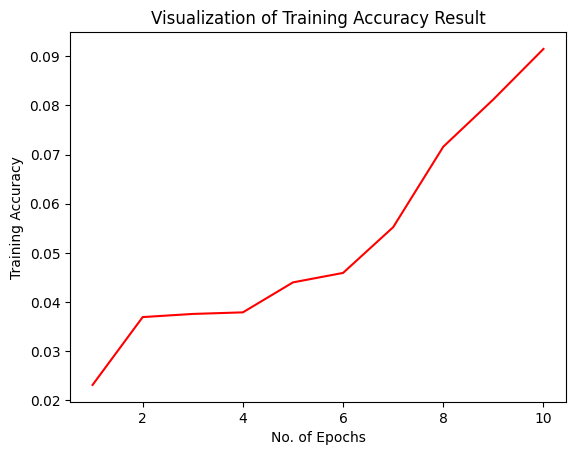

In [ ]:
import matplotlib.pyplot as plt

# Check the length of training history accuracy data
accuracy_data = training_history.history['accuracy']
epochs = [i for i in range(1, len(accuracy_data) + 1)]  # Generate epochs based on accuracy data length

# Plot the accuracy
plt.plot(epochs, accuracy_data, color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()



#Validation Accuracy

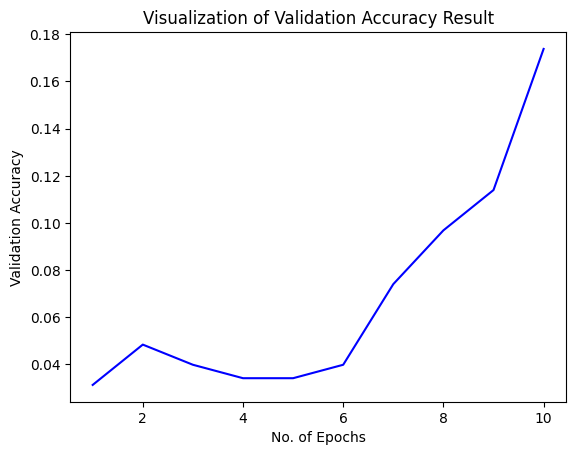

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

#Test set Evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/AI Project/Smart Fruits and vegetables Classify System/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.1685 - loss: 3.2232
Test accuracy: 0.17270195484161377
